# Main Jupyter Notebook

## Data preparation

In [17]:
from importnb import imports
with imports("ipynb"):
    from common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        print_feature_outliers,
        remove_outliers,
        generate_numerical_eda_visualization,
        generate_numerical_heatmap,
        generate_numerical_categorical_heatmap,
        generate_categorical_count_visualization,
        generate_numerical_vs_categorical_eda_visualization,
        # generate_time_series_visualization,
        generate_categorical_group_time_series_visualization,
        generate_categorical_time_series_visualization,
        generate_time_series_linear_regression
    )

In [18]:
parameters = load_parameters(".")
# print(parameters)

In [19]:
DatasetRaw = load_dataset(parameters['load_dataset_parameters'])
DatasetRaw.info()
DatasetRaw.head(5)
# DatasetRaw.to_csv("mixed_remaining_lease_type.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190045 entries, 0 to 190044
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                190045 non-null  datetime64[ns]
 1   town                 190045 non-null  category      
 2   flat_type            190045 non-null  category      
 3   block                190045 non-null  string        
 4   street_name          190045 non-null  string        
 5   storey_range         190045 non-null  category      
 6   floor_area_sqm       190045 non-null  int64         
 7   flat_model           190045 non-null  category      
 8   lease_commence_date  190045 non-null  int64         
 9   remaining_lease      190045 non-null  string        
 10  resale_price         190045 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(3), string(3)
memory usage: 10.9 MB


month        town flat_type block        street_name storey_range   
0 2017-01-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12  \
1 2017-01-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2 2017-01-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3 2017-01-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4 2017-01-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease   
0              44        Improved                 1979  61 years 04 months  \
1              67  New Generation                 1978  60 years 07 months   
2              67  New Generation                 1980  62 years 05 months   
3              68  New Generation                 1980   62 years 01 month   
4              67  New Generation                 1980  62 years 05 months   

   resale_price  
0        232000  
1        250000  
2        262000  
3        265000  
4        265000

## Data Cleanup

In [20]:
CleanUpDatasetFirst = clean_up_dataset(DatasetRaw, parameters['cleanup_parameters_first'])
CleanUpDatasetFirst.info()
CleanUpDatasetFirst.head(5)

[CLEANUP] 'custom_numerical_features' not set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190045 entries, 0 to 190044
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   month            190045 non-null  datetime64[ns]
 1   town             190045 non-null  category      
 2   flat_type        190045 non-null  category      
 3   storey_range     190045 non-null  category      
 4   floor_area_sqm   190045 non-null  int64         
 5   flat_model       190045 non-null  category      
 6   remaining_lease  190045 non-null  int64         
 7   resale_price     190045 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(3)
memory usage: 6.5 MB


month        town flat_type storey_range  floor_area_sqm   
0 2017-01-01  ANG MO KIO    2 ROOM     10 TO 12              44  \
1 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   
2 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   
3 2017-01-01  ANG MO KIO    3 ROOM     04 TO 06              68   
4 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   

       flat_model  remaining_lease  resale_price  
0        Improved               61        232000  
1  New Generation               60        250000  
2  New Generation               62        262000  
3  New Generation               62        265000  
4  New Generation               62        265000

In [21]:
CleanUpDatasetFirst.describe()

month  floor_area_sqm  remaining_lease   
count                         190045   190045.000000    190045.000000  \
mean   2019-07-02 18:41:38.755557888       97.417138        74.214481   
min              2015-01-01 00:00:00       31.000000        42.000000   
25%              2017-07-01 00:00:00       82.000000        64.000000   
50%              2019-09-01 00:00:00       94.000000        74.000000   
75%              2021-08-01 00:00:00      112.000000        85.000000   
max              2023-05-01 00:00:00      280.000000        97.000000   
std                              NaN       24.090047        13.210839   

       resale_price  
count  1.900450e+05  
mean   4.730579e+05  
min    1.400000e+05  
25%    3.550000e+05  
50%    4.400000e+05  
75%    5.580000e+05  
max    1.418000e+06  
std    1.621003e+05

In [22]:
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters['cleanup_parameters_second'])
CleanUpDataset.info()
CleanUpDataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190045 entries, 0 to 190044
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   month            190045 non-null  datetime64[ns]
 1   town             190045 non-null  category      
 2   flat_type        190045 non-null  category      
 3   storey_range     190045 non-null  category      
 4   floor_area_sqm   190045 non-null  int64         
 5   flat_model       190045 non-null  category      
 6   remaining_lease  190045 non-null  int64         
 7   resale_price     190045 non-null  int64         
 8   price_per_sqm    190045 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(4)
memory usage: 8.0 MB


month        town flat_type storey_range  floor_area_sqm   
0 2017-01-01  ANG MO KIO    2 ROOM     10 TO 12              44  \
1 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   
2 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   
3 2017-01-01  ANG MO KIO    3 ROOM     04 TO 06              68   
4 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   

       flat_model  remaining_lease  resale_price  price_per_sqm  
0        Improved               61        232000           5272  
1  New Generation               60        250000           3731  
2  New Generation               62        262000           3910  
3  New Generation               62        265000           3897  
4  New Generation               62        265000           3955

In [23]:
CleanUpDataset.describe()

month  floor_area_sqm  remaining_lease   
count                         190045   190045.000000    190045.000000  \
mean   2019-07-02 18:41:38.755557888       97.417138        74.214481   
min              2015-01-01 00:00:00       31.000000        42.000000   
25%              2017-07-01 00:00:00       82.000000        64.000000   
50%              2019-09-01 00:00:00       94.000000        74.000000   
75%              2021-08-01 00:00:00      112.000000        85.000000   
max              2023-05-01 00:00:00      280.000000        97.000000   
std                              NaN       24.090047        13.210839   

       resale_price  price_per_sqm  
count  1.900450e+05  190045.000000  
mean   4.730579e+05    4899.498898  
min    1.400000e+05    2089.000000  
25%    3.550000e+05    4000.000000  
50%    4.400000e+05    4602.000000  
75%    5.580000e+05    5434.000000  
max    1.418000e+06   14736.000000  
std    1.621003e+05    1327.422132

## Correlation of dataframe features

In [24]:
# generate_numerical_categorical_heatmap(CleanUpDatasetFirst)

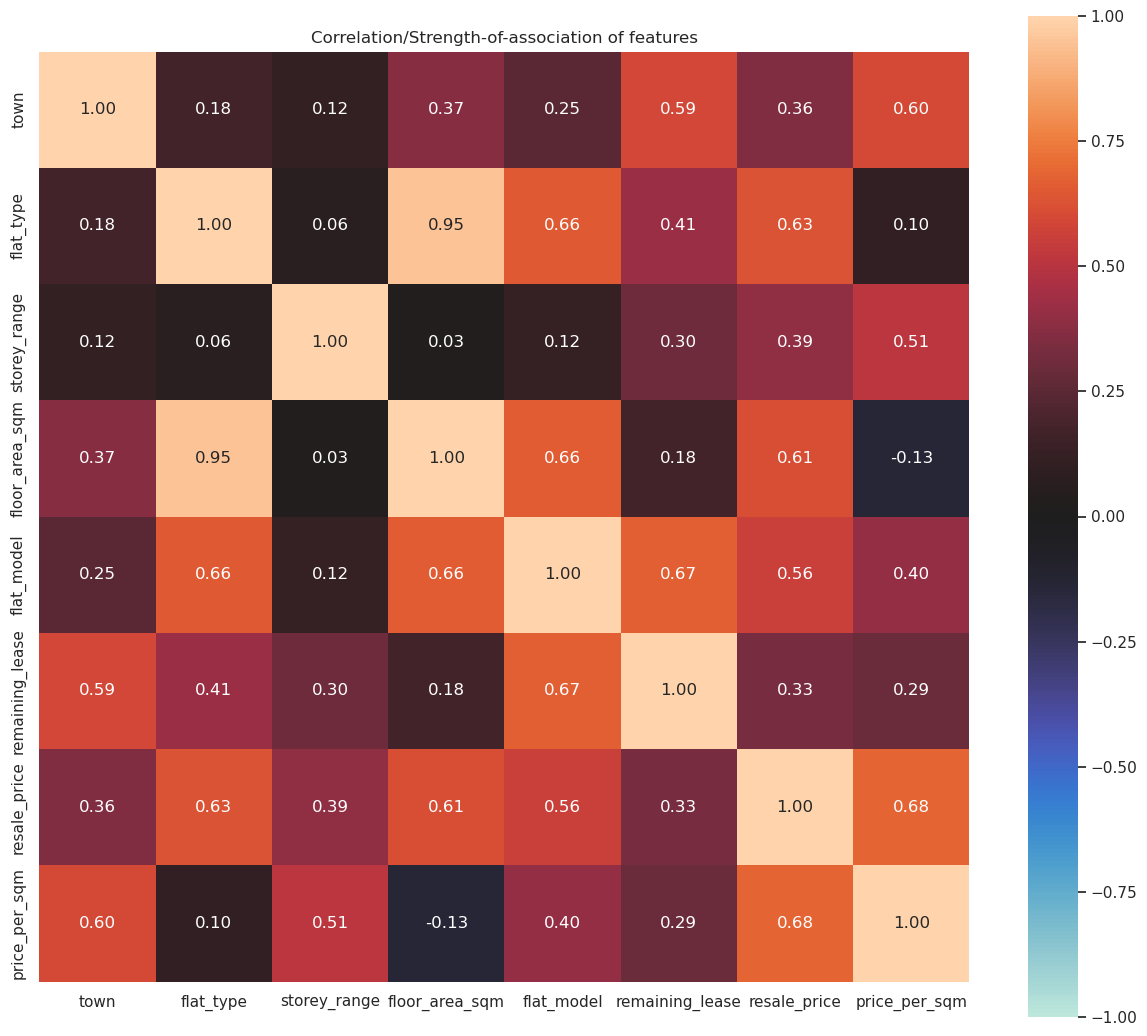

In [25]:
generate_numerical_categorical_heatmap(CleanUpDataset)

## Simple Exploratory Data Analysis

In [26]:
CleanUpDataset.describe()

month  floor_area_sqm  remaining_lease   
count                         190045   190045.000000    190045.000000  \
mean   2019-07-02 18:41:38.755557888       97.417138        74.214481   
min              2015-01-01 00:00:00       31.000000        42.000000   
25%              2017-07-01 00:00:00       82.000000        64.000000   
50%              2019-09-01 00:00:00       94.000000        74.000000   
75%              2021-08-01 00:00:00      112.000000        85.000000   
max              2023-05-01 00:00:00      280.000000        97.000000   
std                              NaN       24.090047        13.210839   

       resale_price  price_per_sqm  
count  1.900450e+05  190045.000000  
mean   4.730579e+05    4899.498898  
min    1.400000e+05    2089.000000  
25%    3.550000e+05    4000.000000  
50%    4.400000e+05    4602.000000  
75%    5.580000e+05    5434.000000  
max    1.418000e+06   14736.000000  
std    1.621003e+05    1327.422132

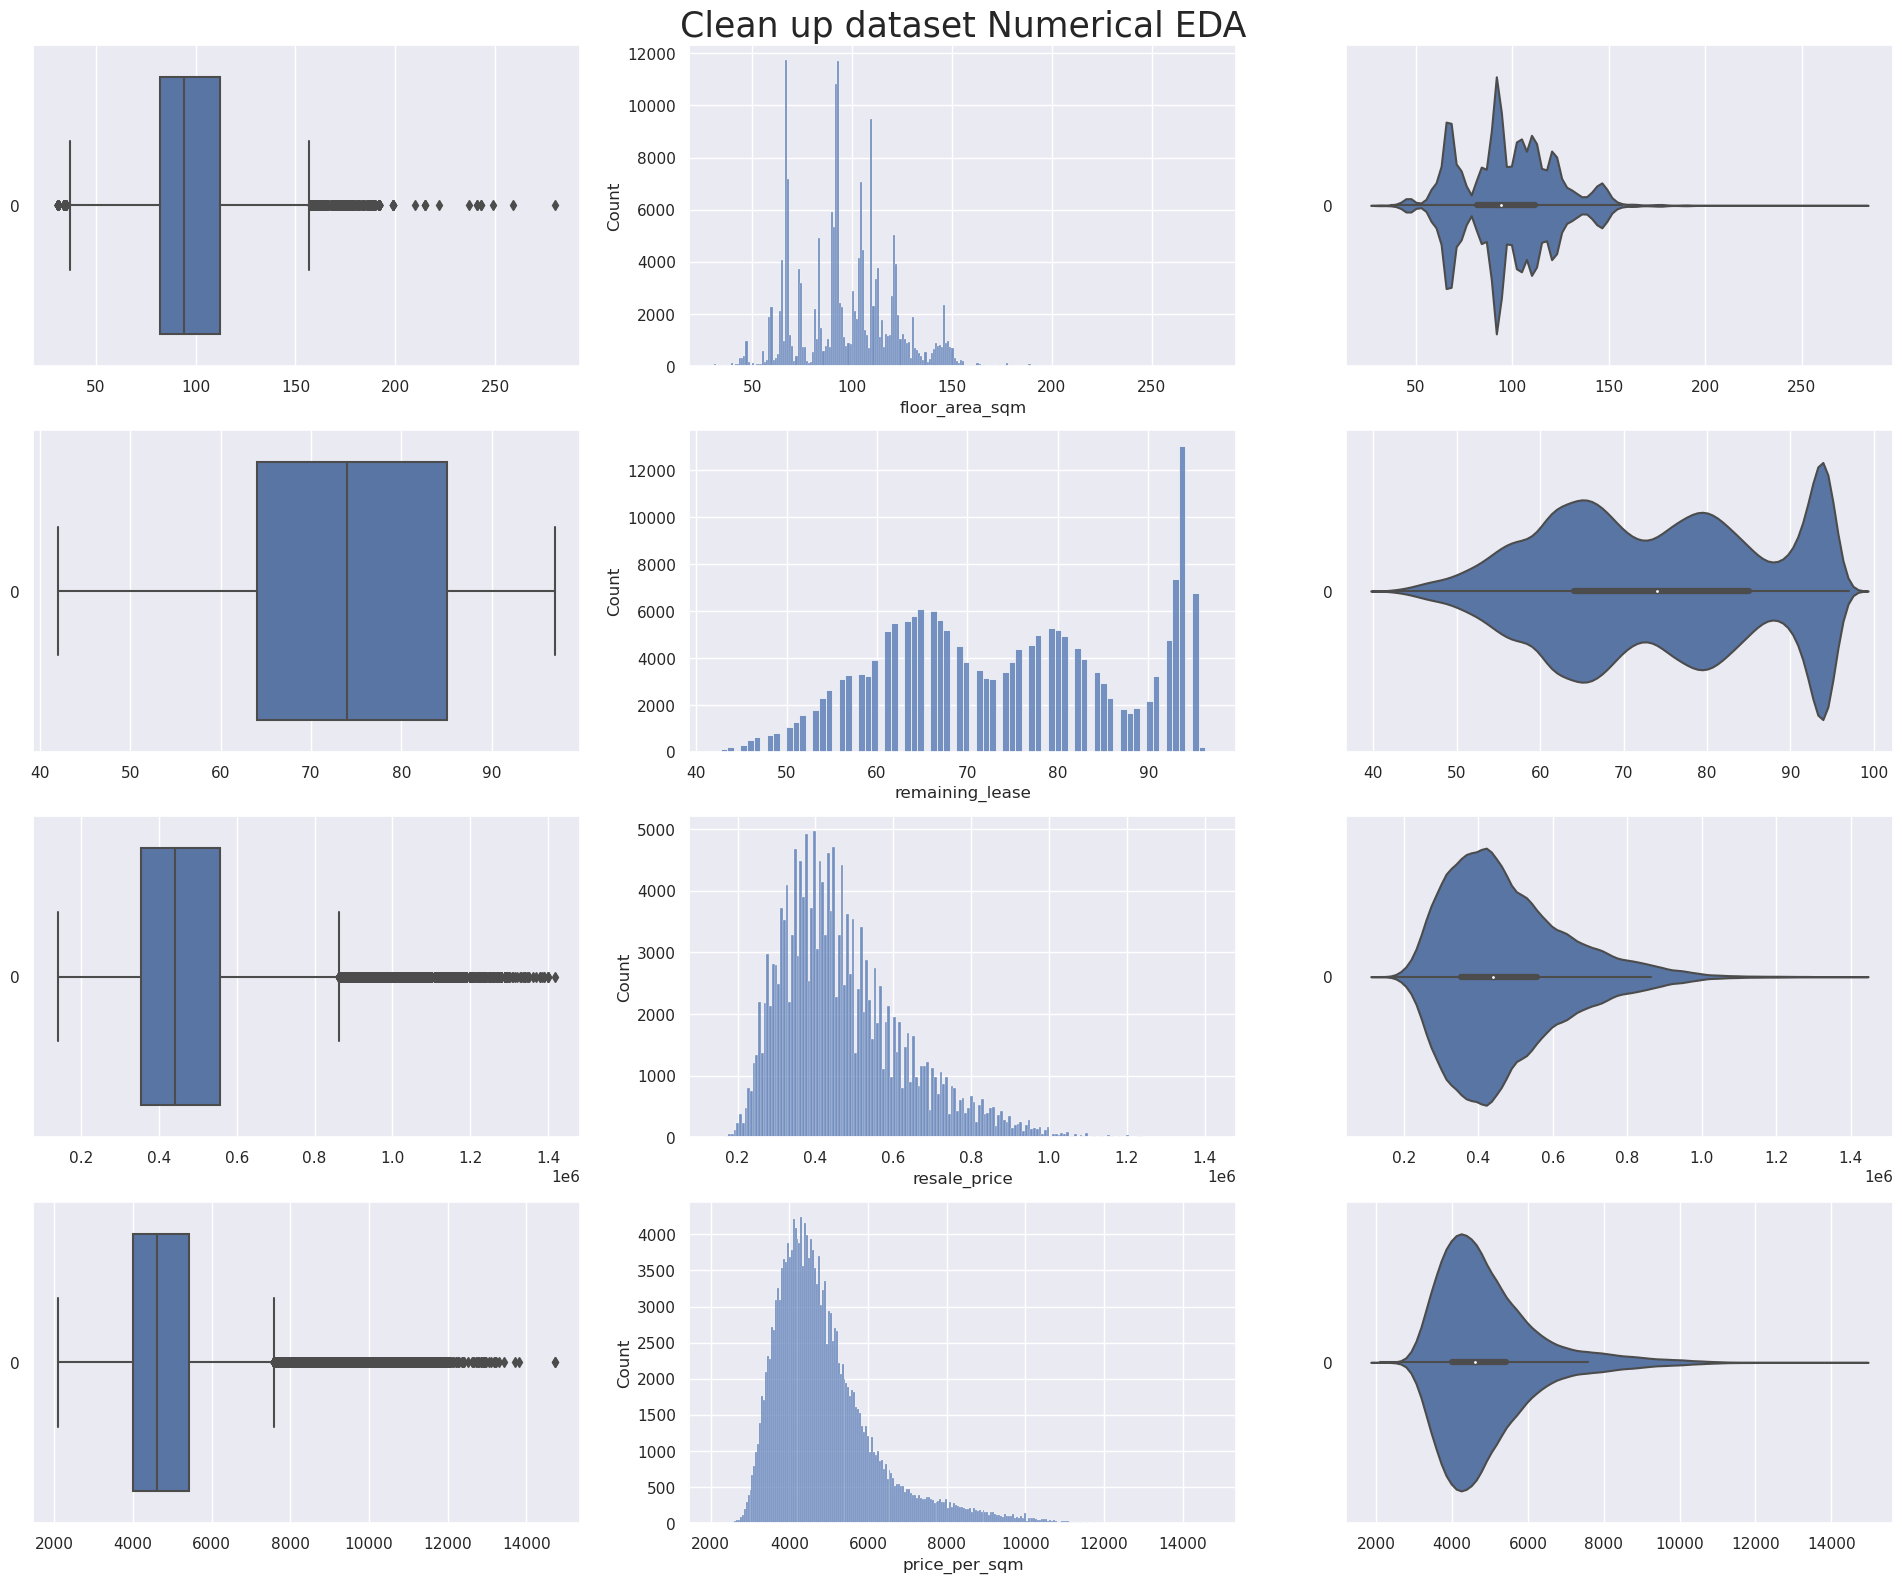

In [27]:
generate_numerical_eda_visualization(CleanUpDataset, "Clean up dataset Numerical EDA")

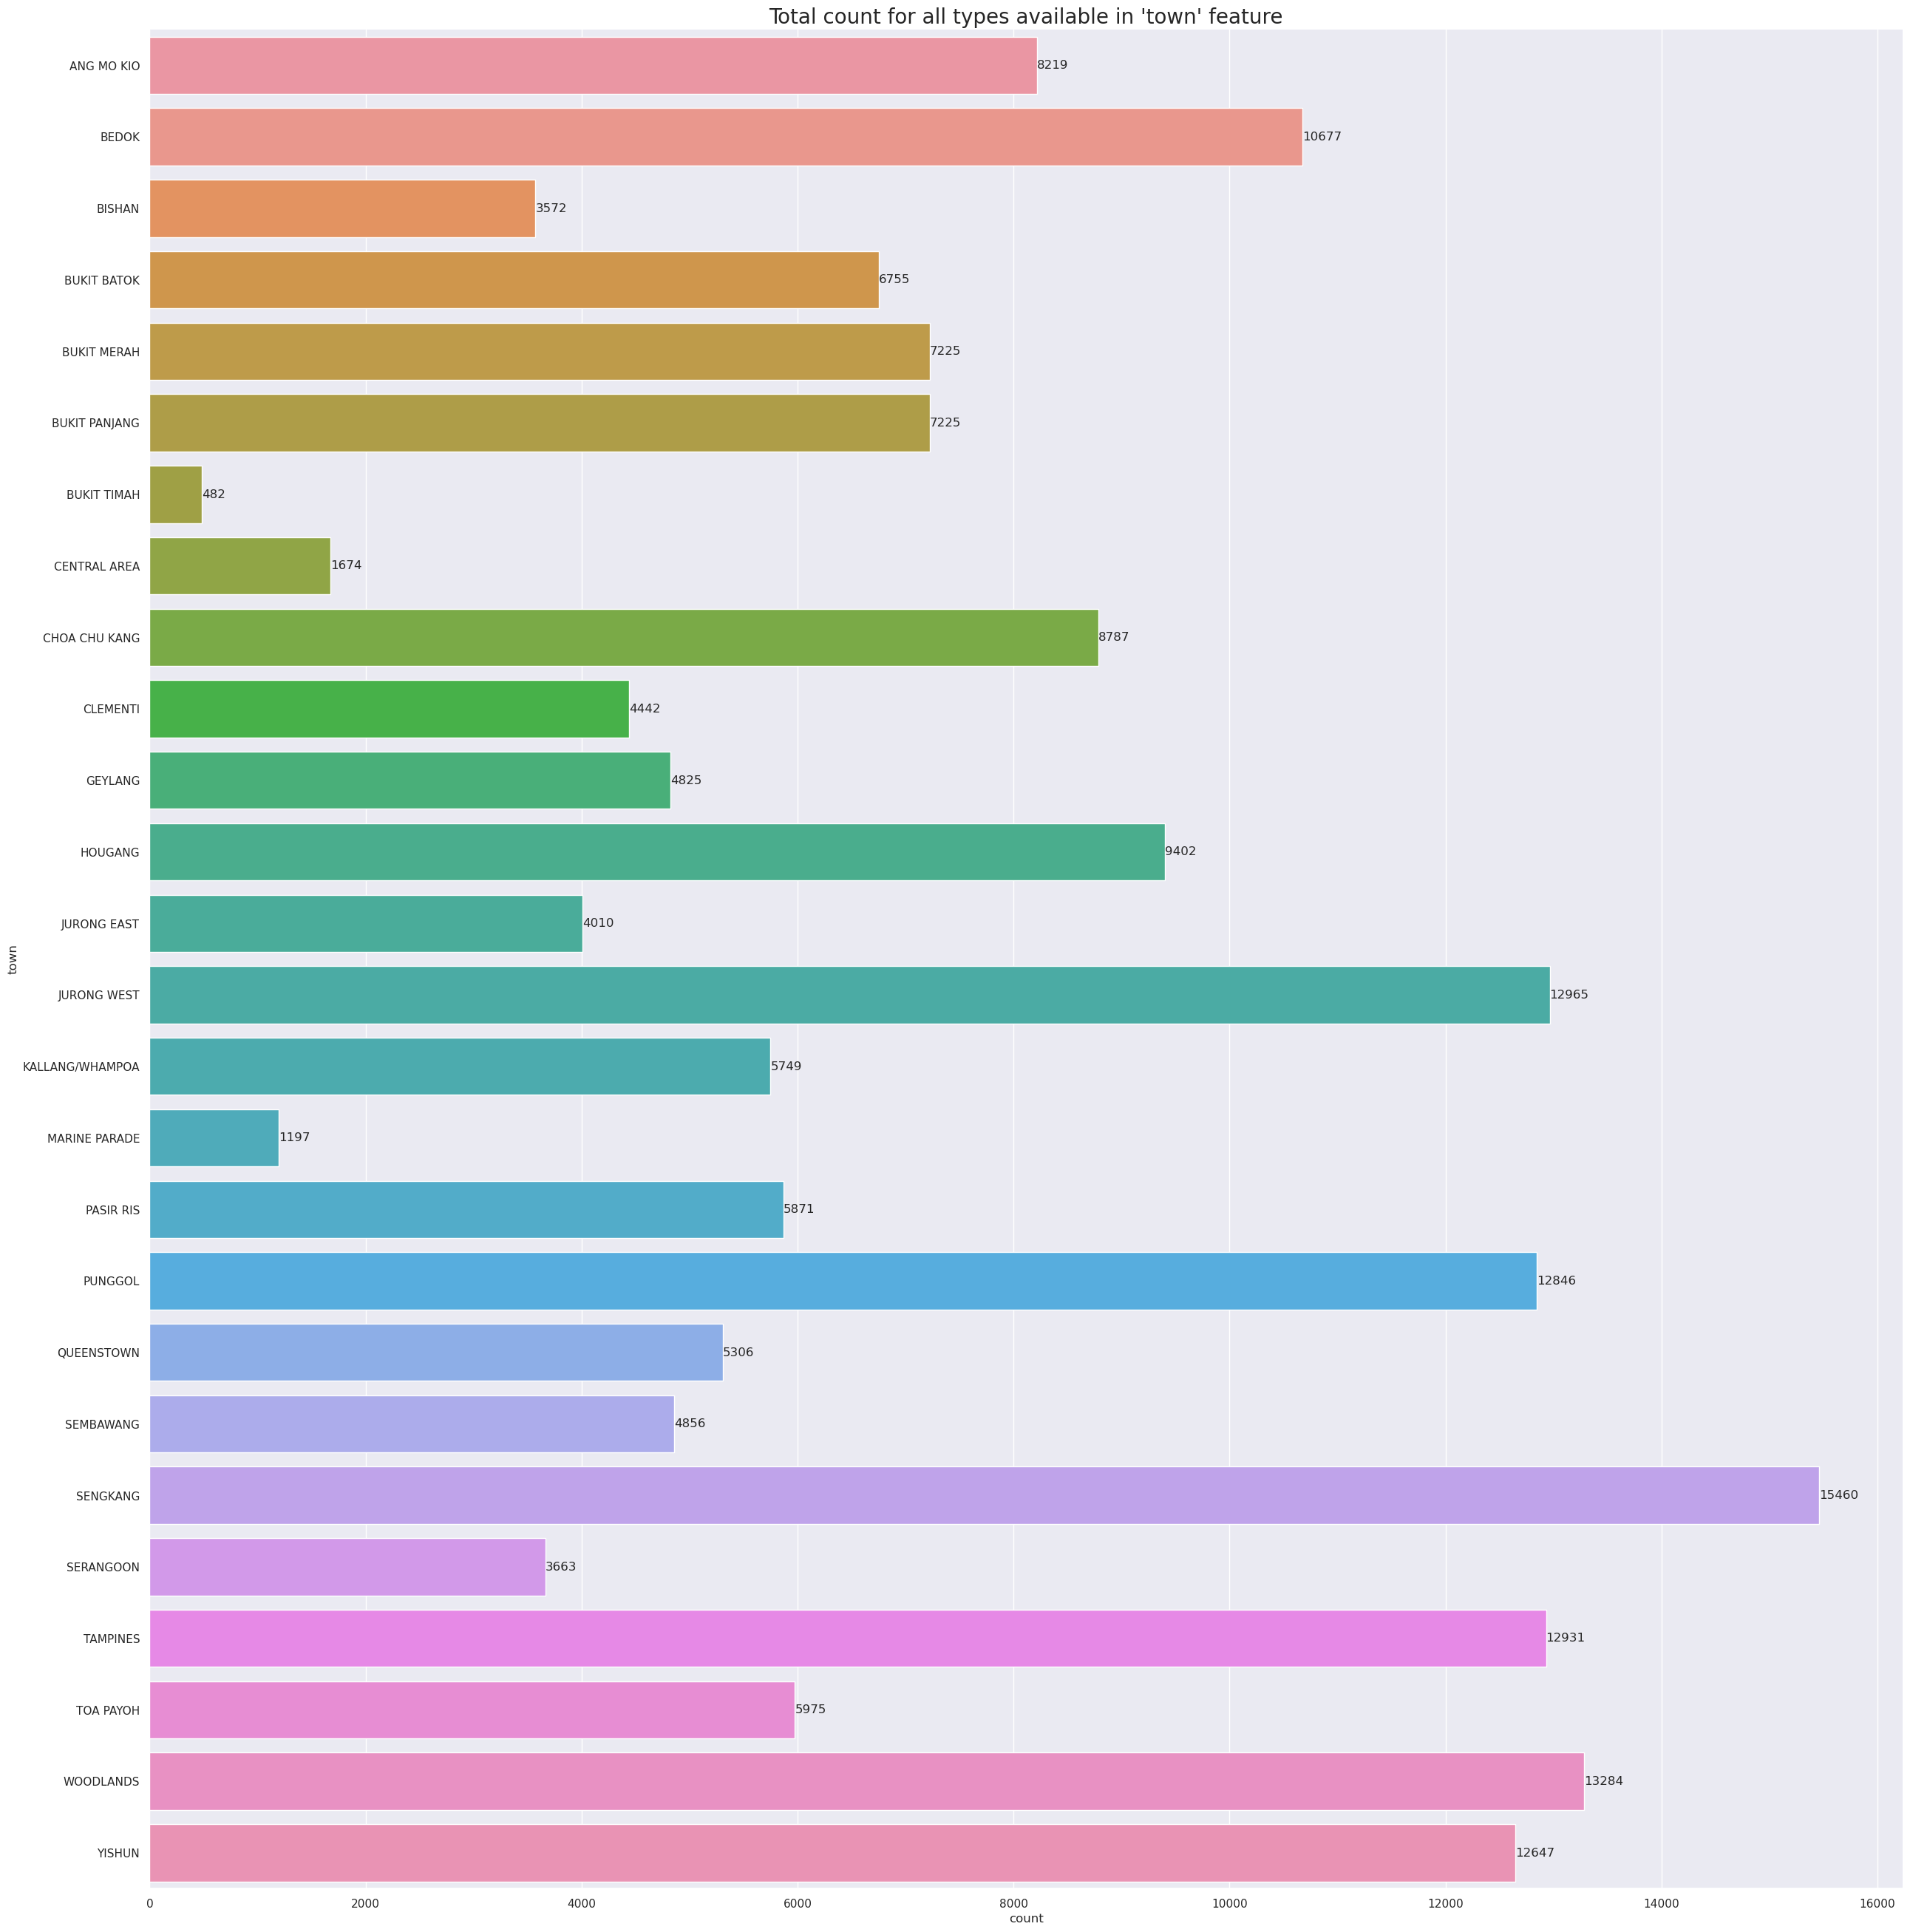

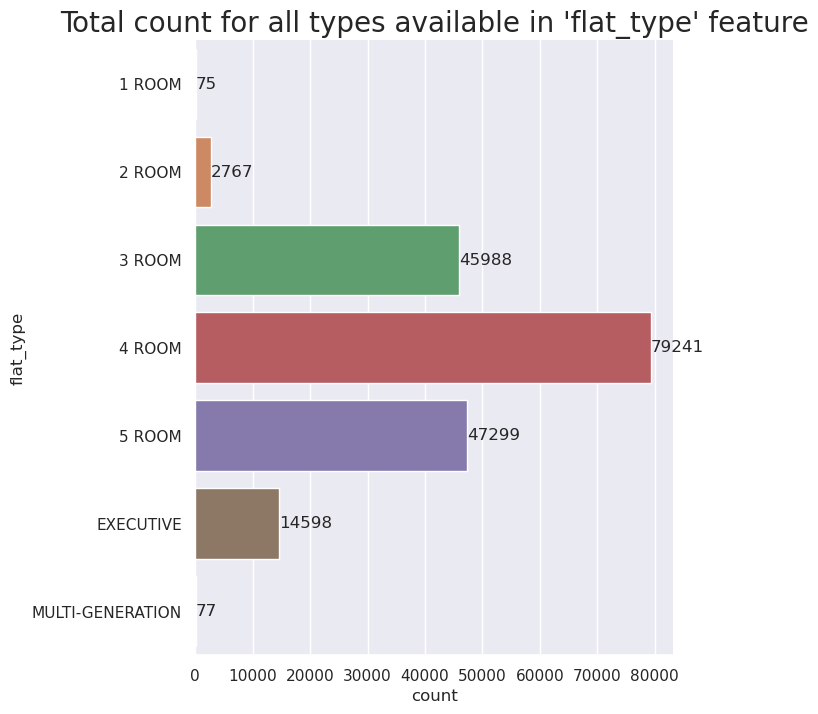

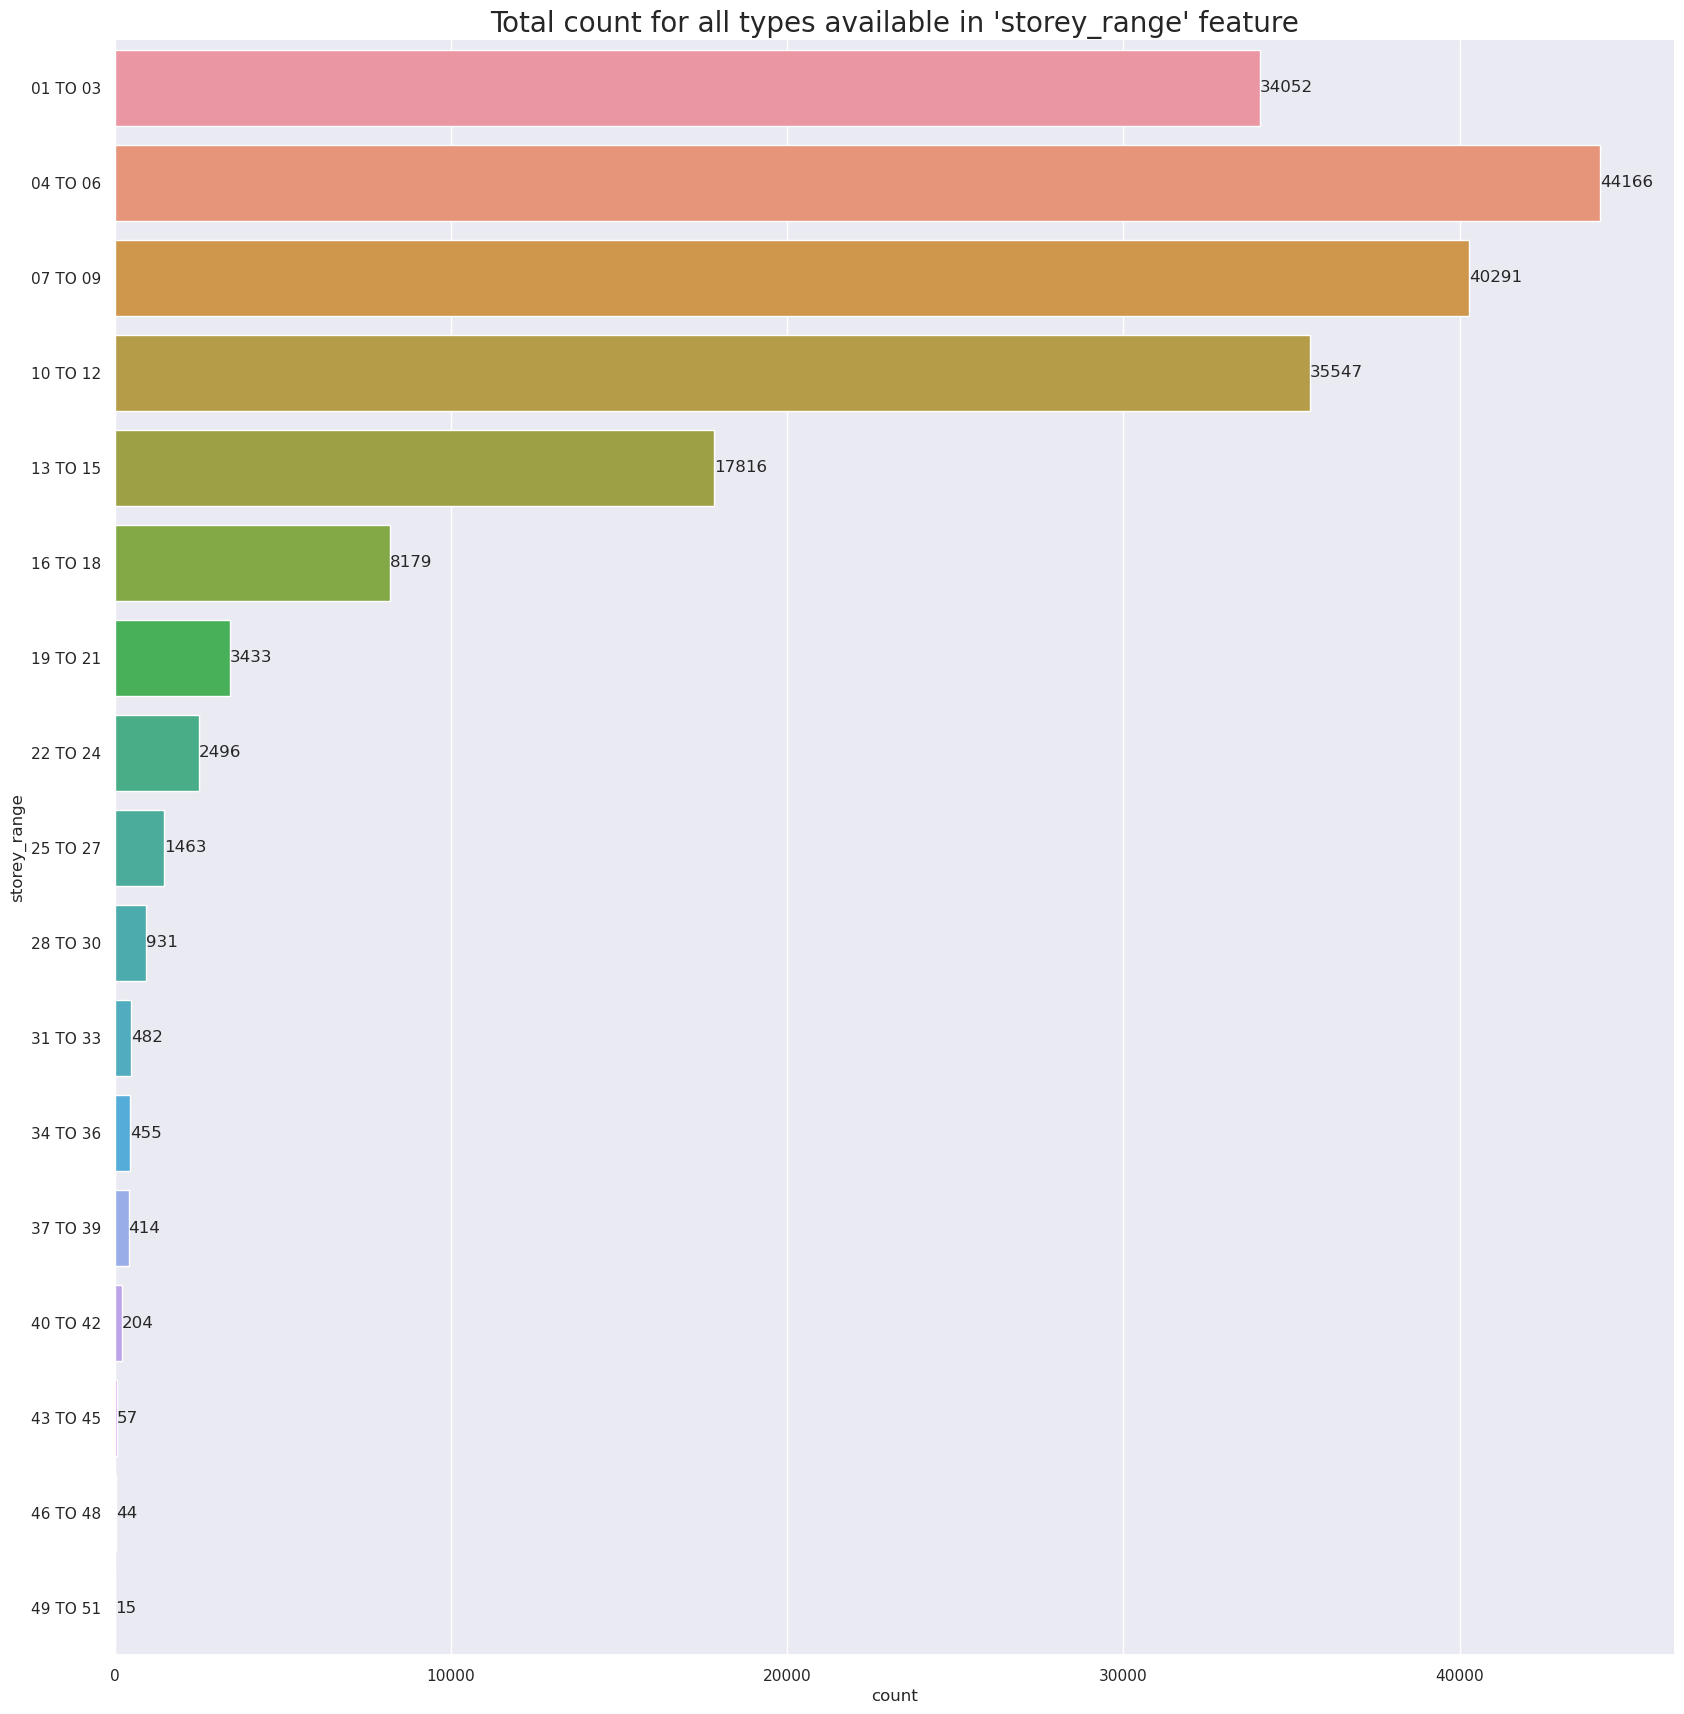

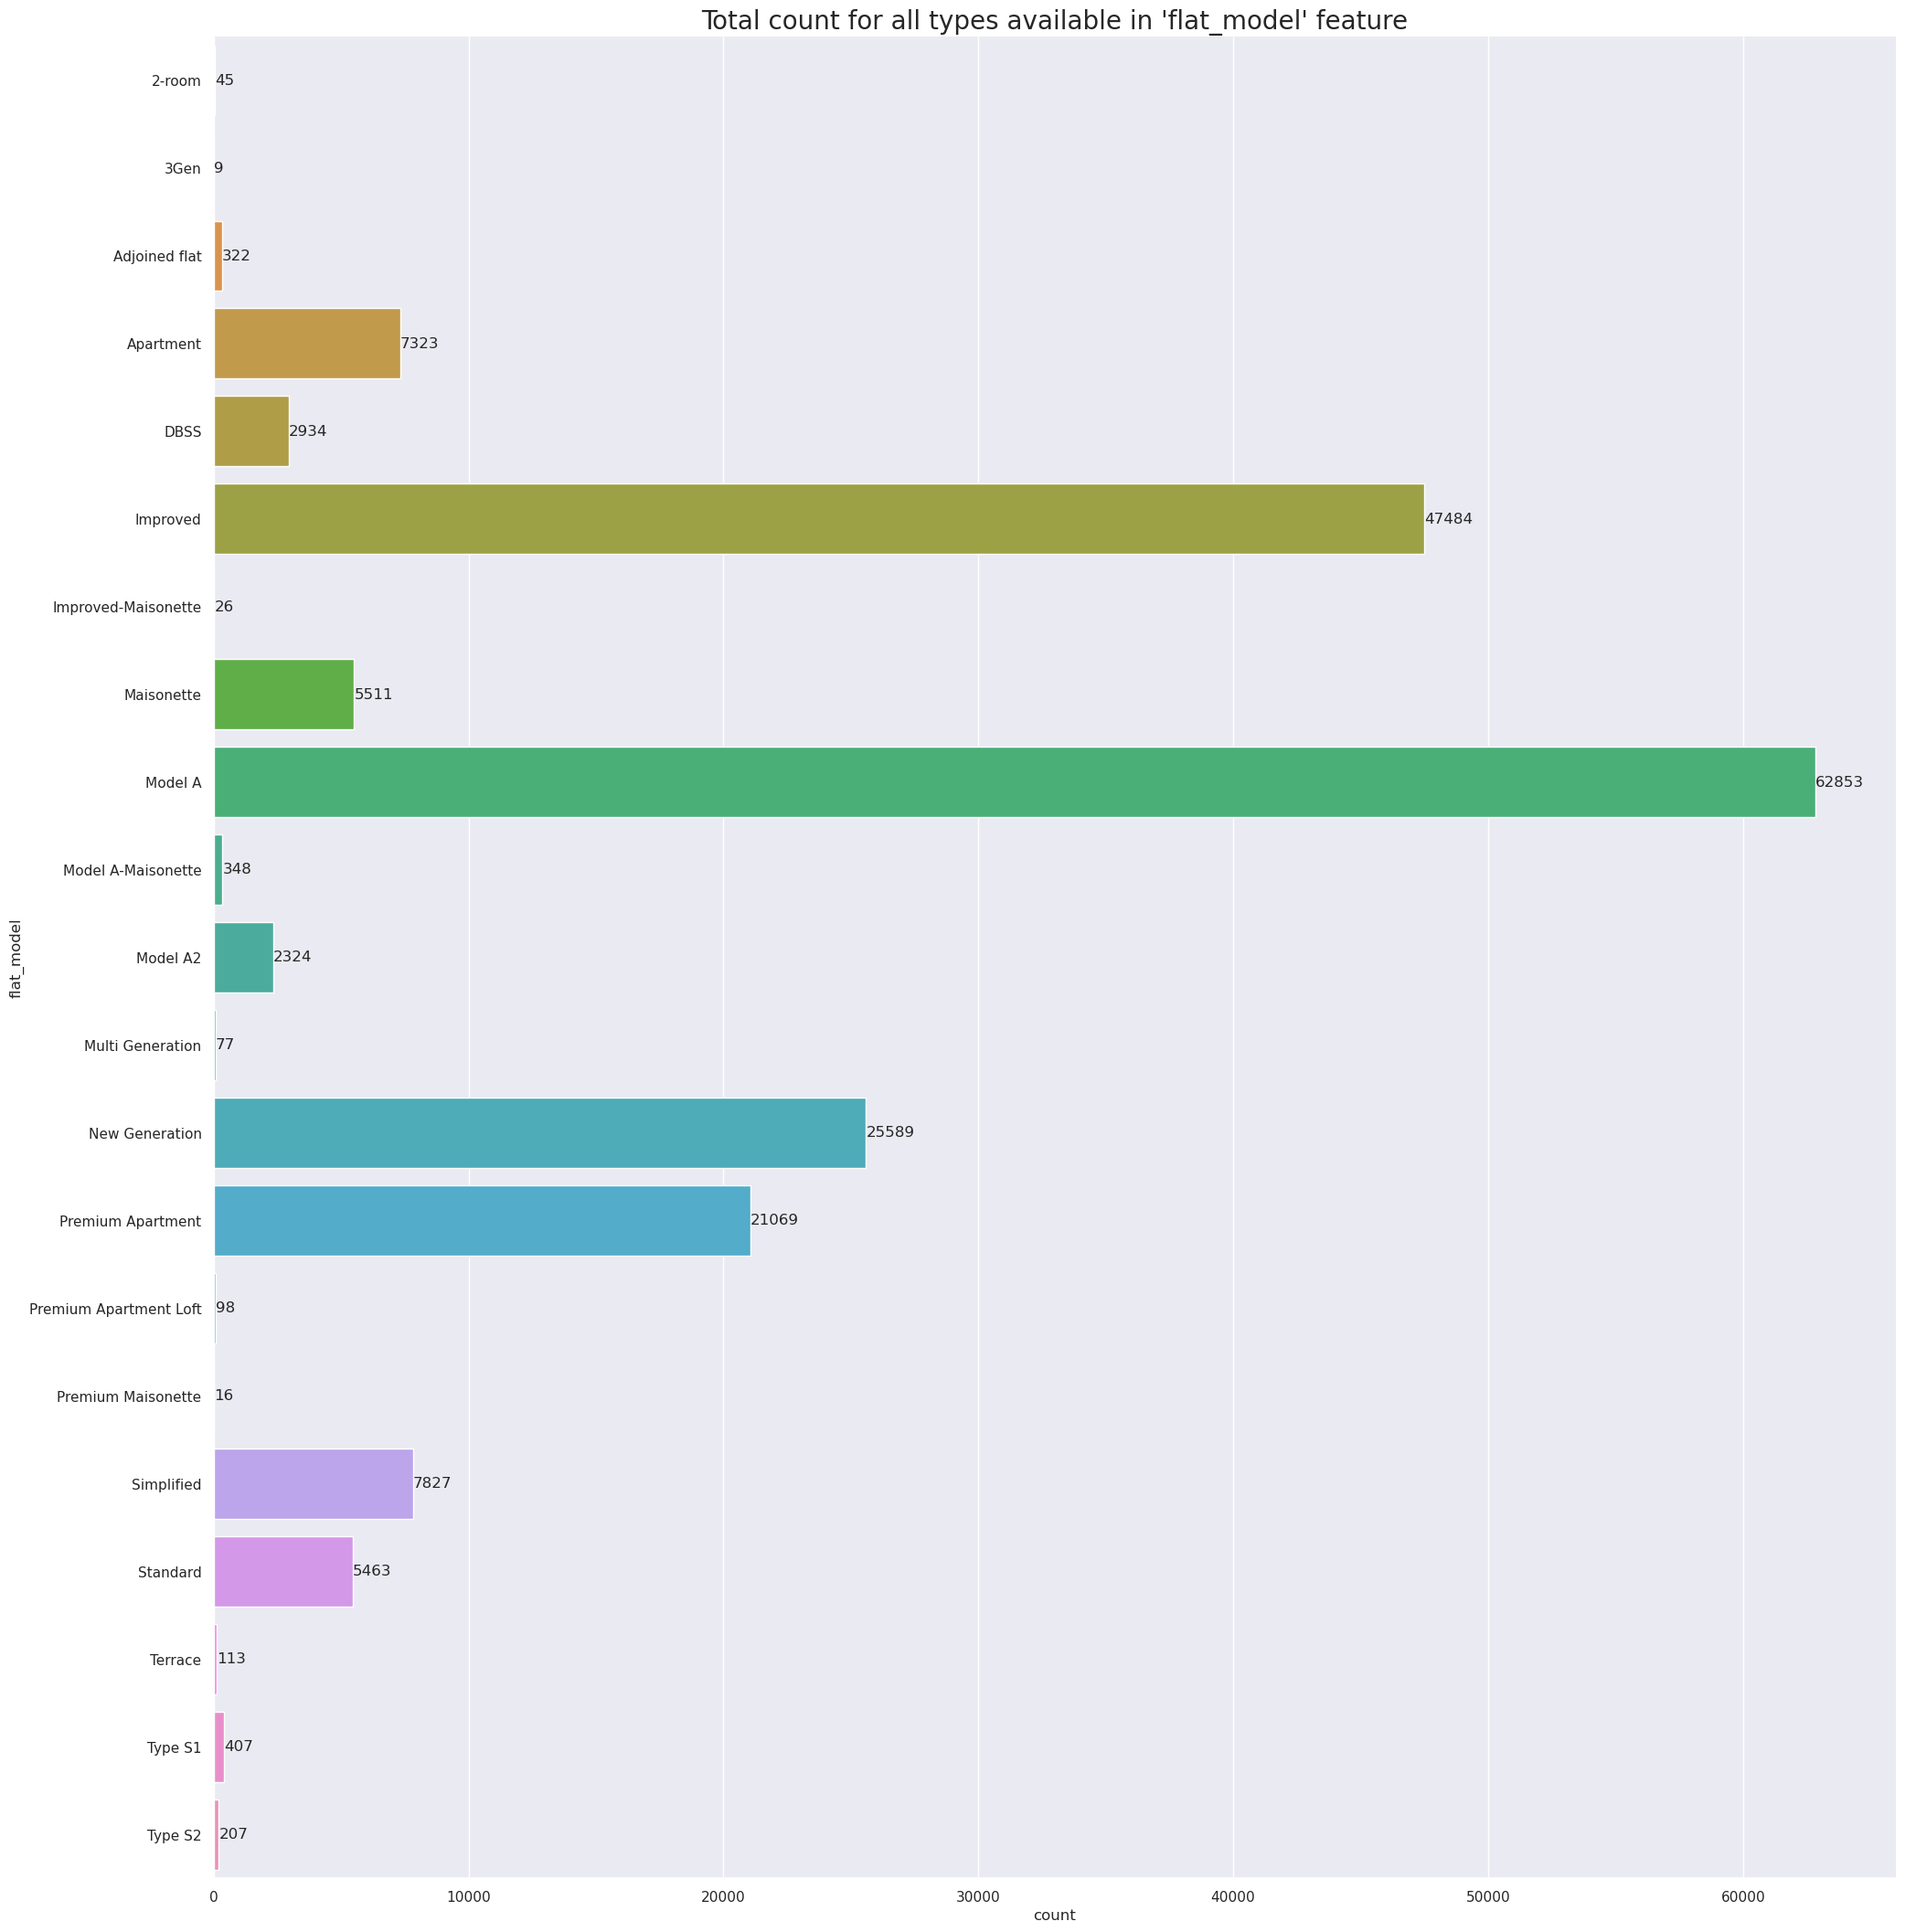

In [28]:
generate_categorical_count_visualization(CleanUpDataset, parameters['categorical_count_visualization_parameters'])

/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:491: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=10.0)


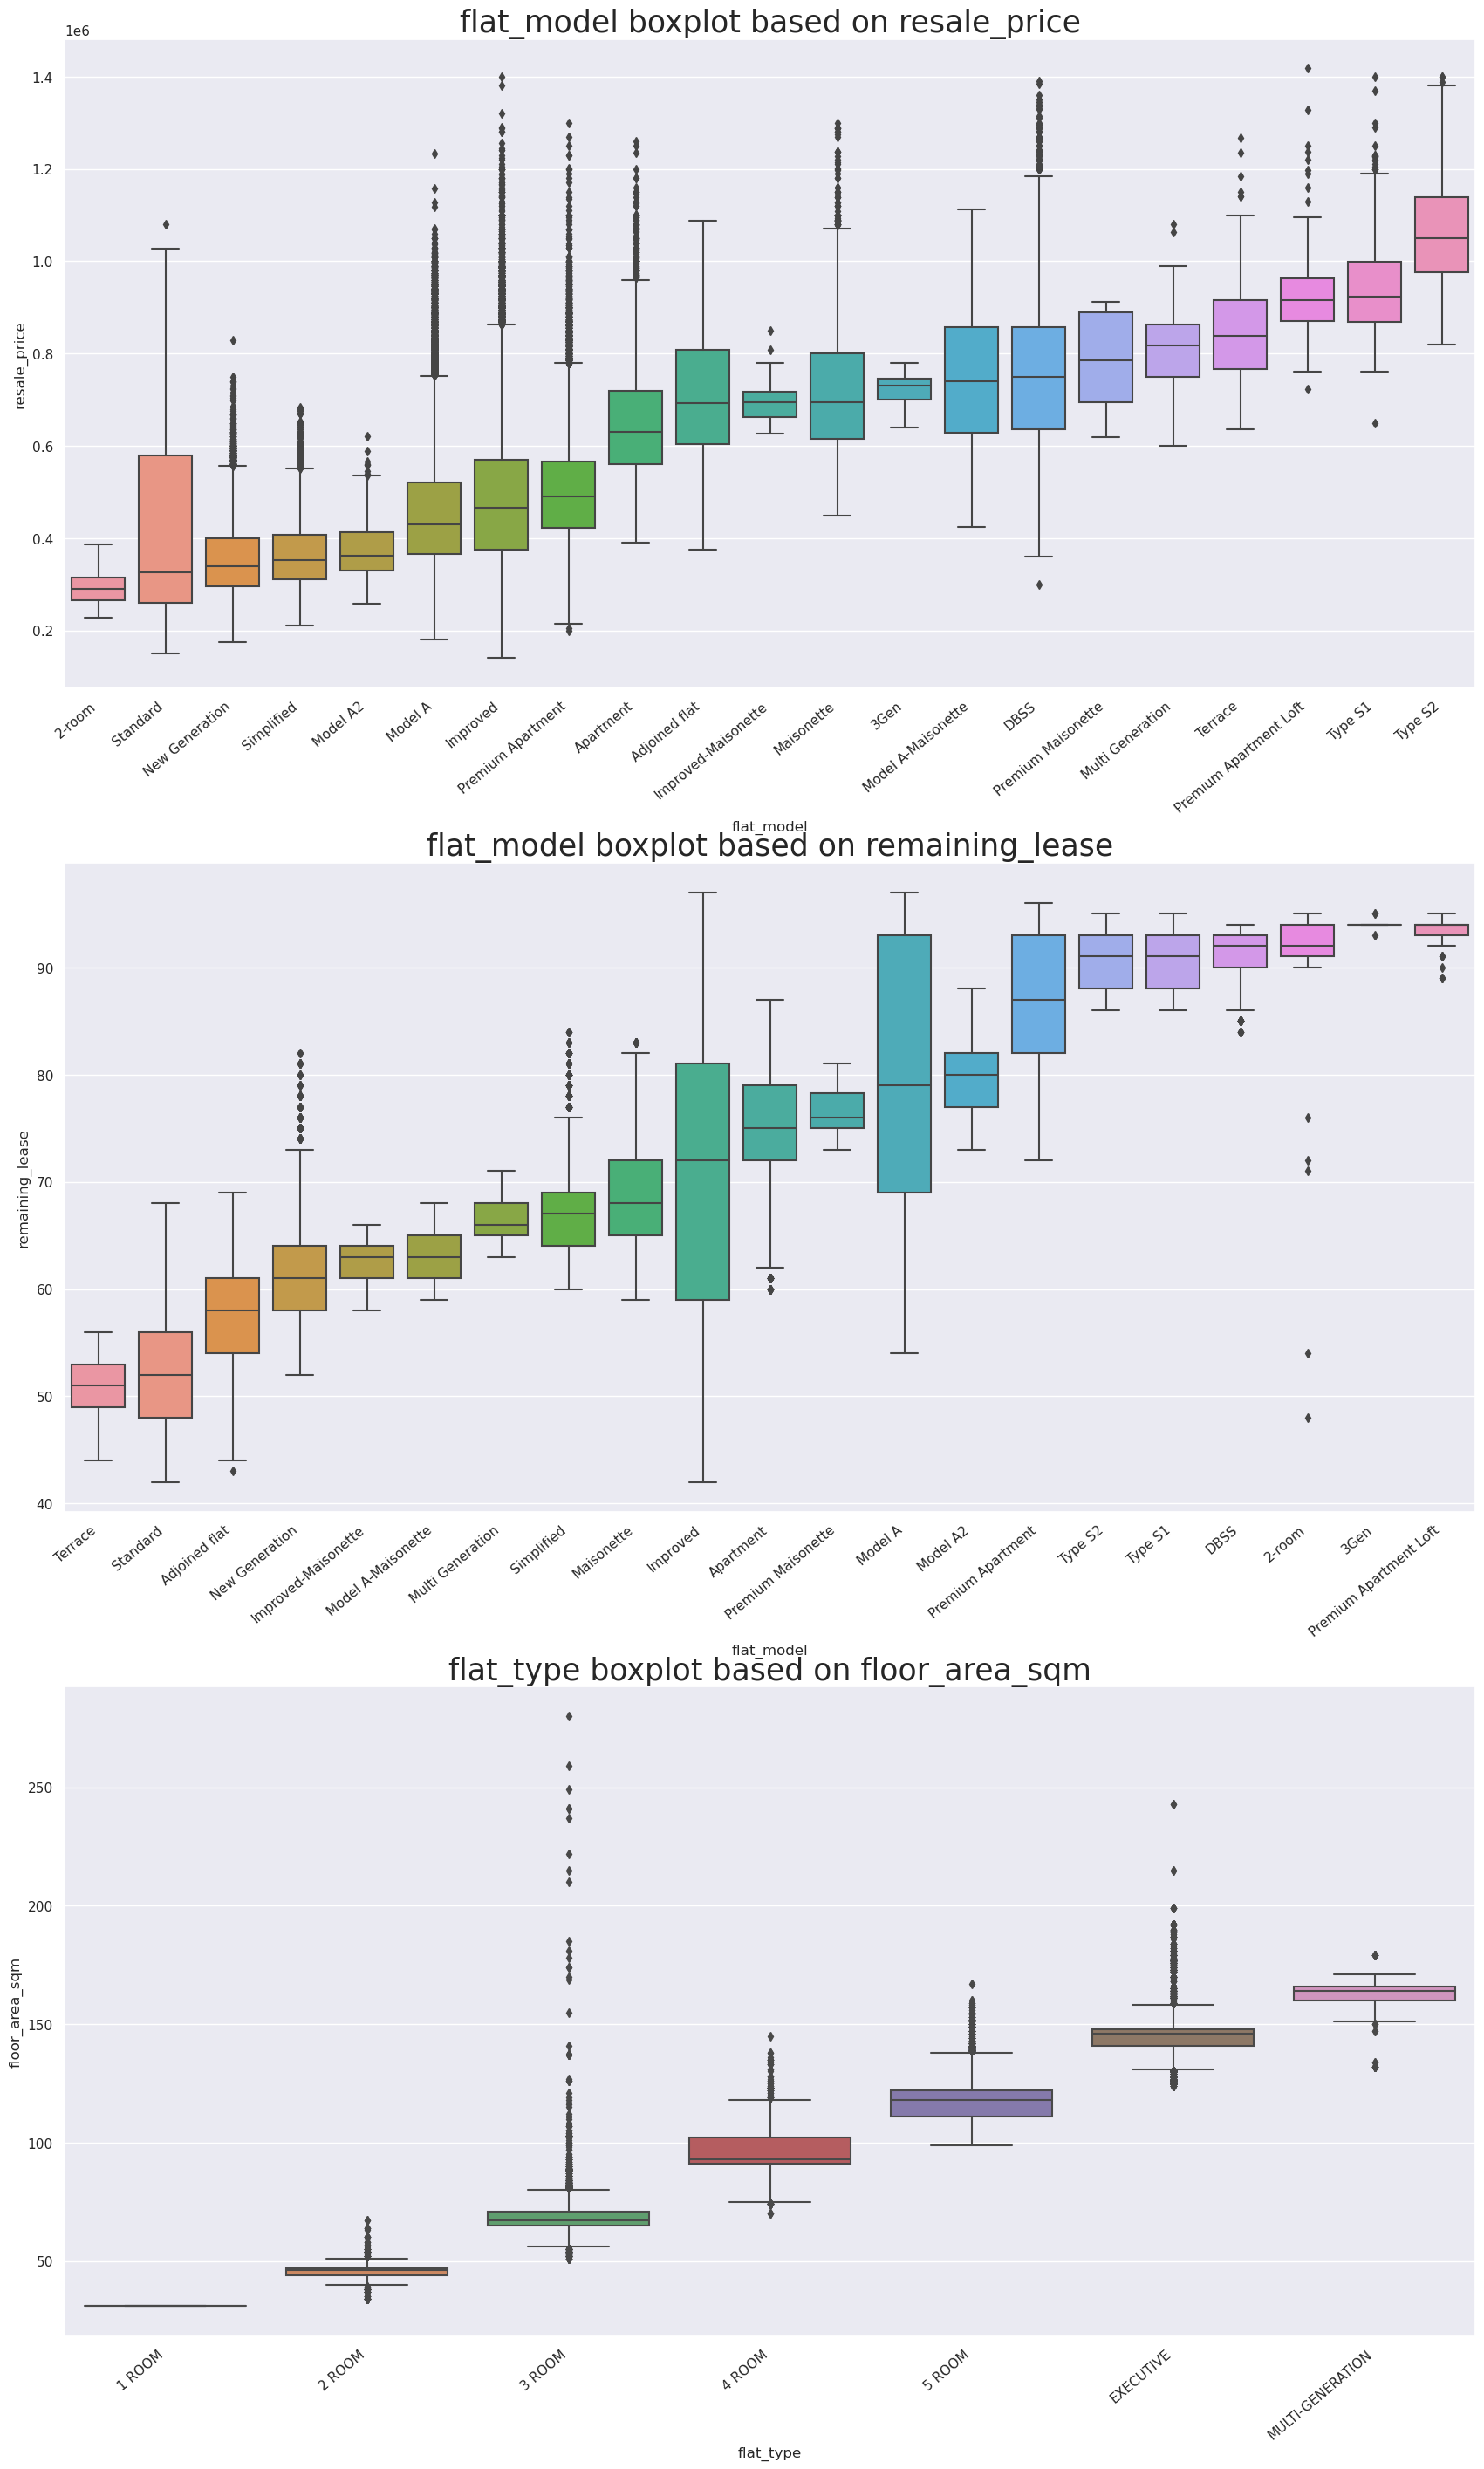

In [29]:
generate_numerical_vs_categorical_eda_visualization(
    CleanUpDataset, 
    parameters['numerical_vs_categorical_eda_visualization_parameters'], 
    '[UNION outliers removed] num_subscriber VS category'
)

## Categorical time series graph

### Graph per group of the category

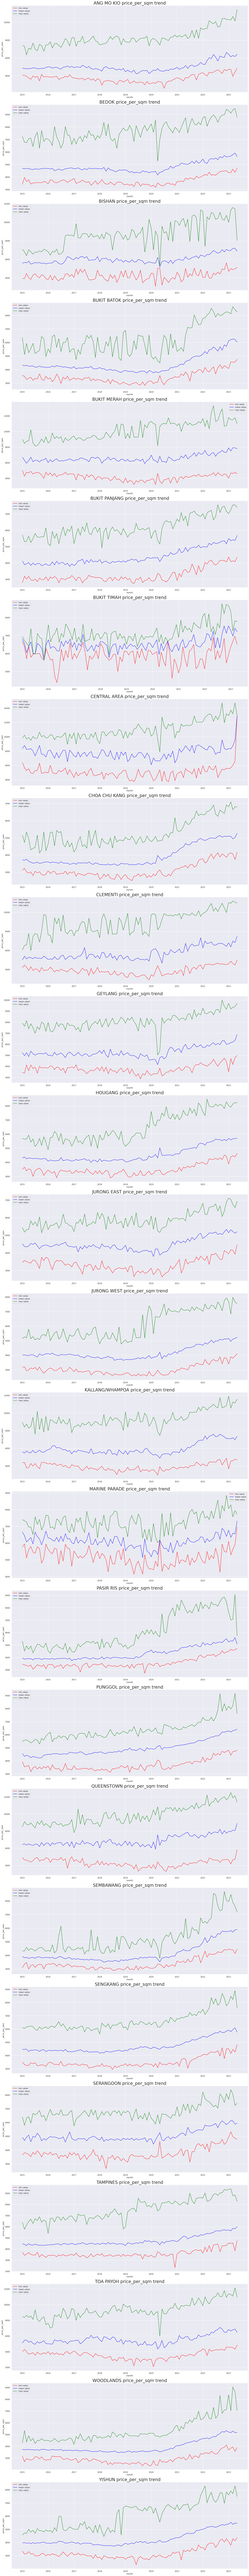

In [30]:
generate_categorical_group_time_series_visualization(CleanUpDataset, parameters['time_series_parameters'])

### Single graph for all groups of the catergory

/home/uie41932/miniconda3/envs/cc0002/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/uie41932/miniconda3/envs/cc0002/lib/python3.10/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


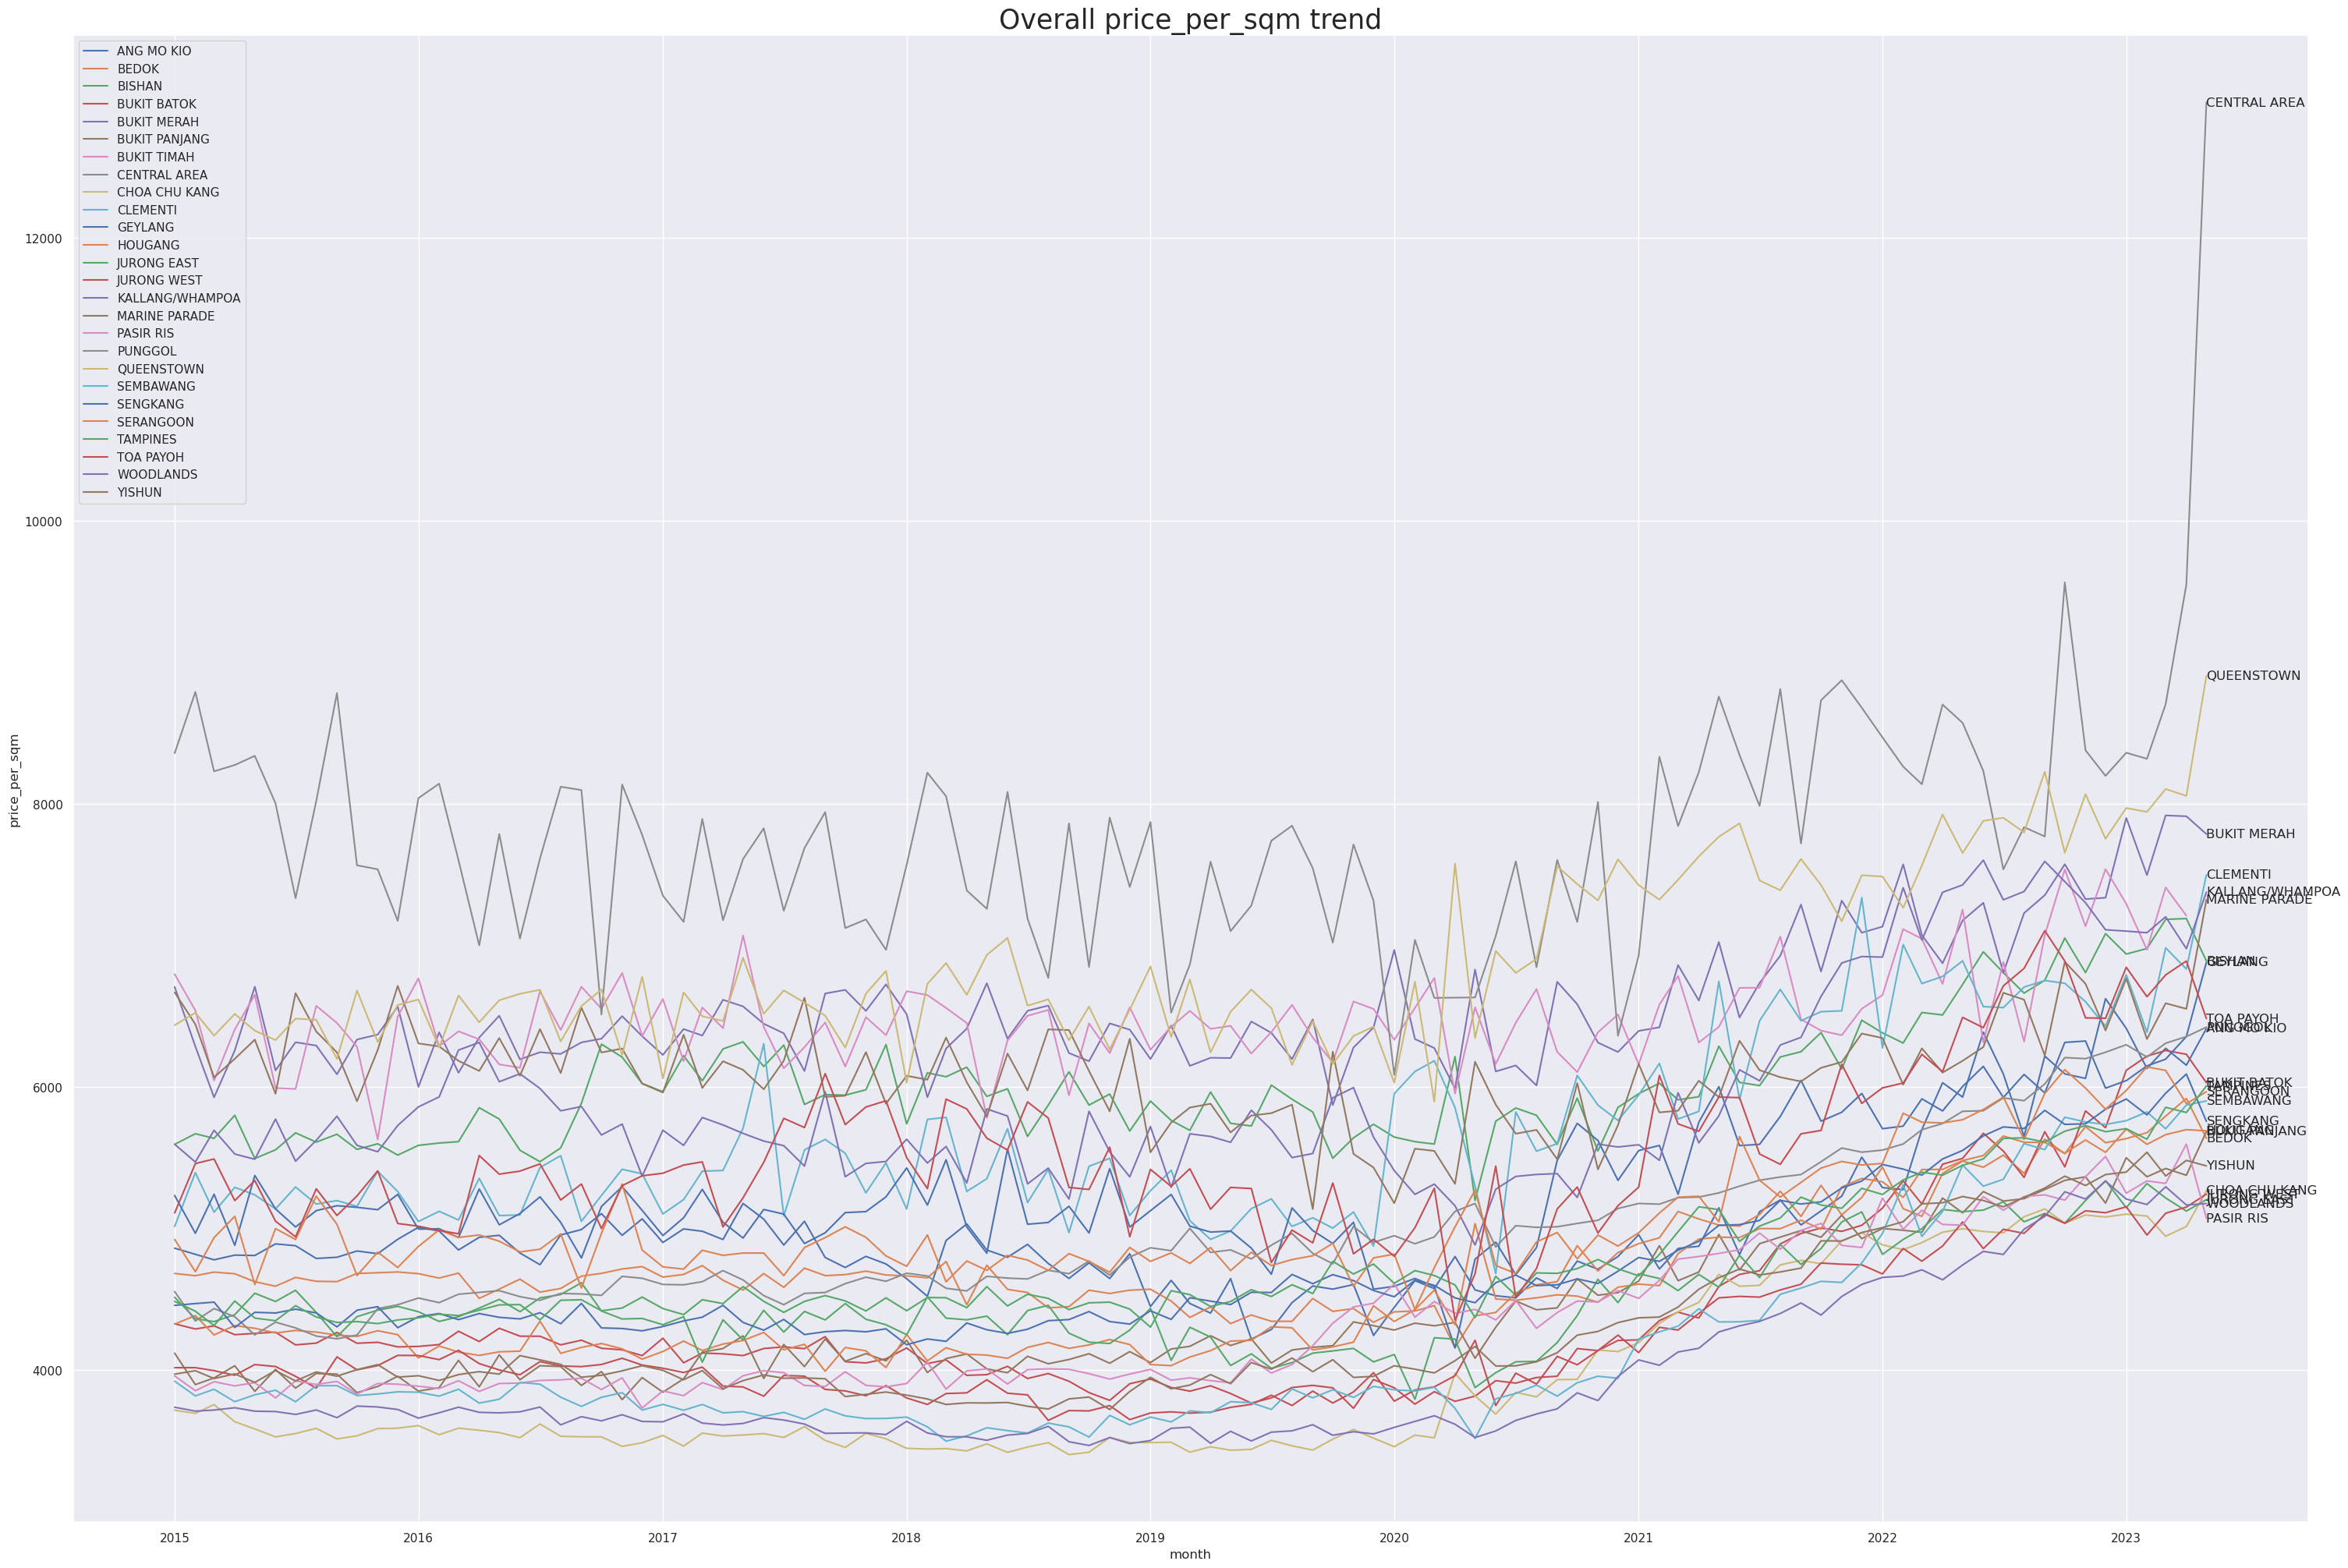

In [31]:
generate_categorical_time_series_visualization(CleanUpDataset, parameters['time_series_parameters'])

## Time series linear regression

Linear regression model for 'ANG MO KIO':
                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     41.61
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           4.12e-09
Time:                        14:15:40   Log-Likelihood:                -759.22
No. Observations:                 101   AIC:                             1522.
Df Residuals:                      99   BIC:                             1528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:830: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(new_labels)
/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:830: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(new_labels)
/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:830: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(new_labels)
/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:830: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(new_labels)
/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:830: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(new_labels)
/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:830: UserWarning: FixedFormatter should only be used together wit

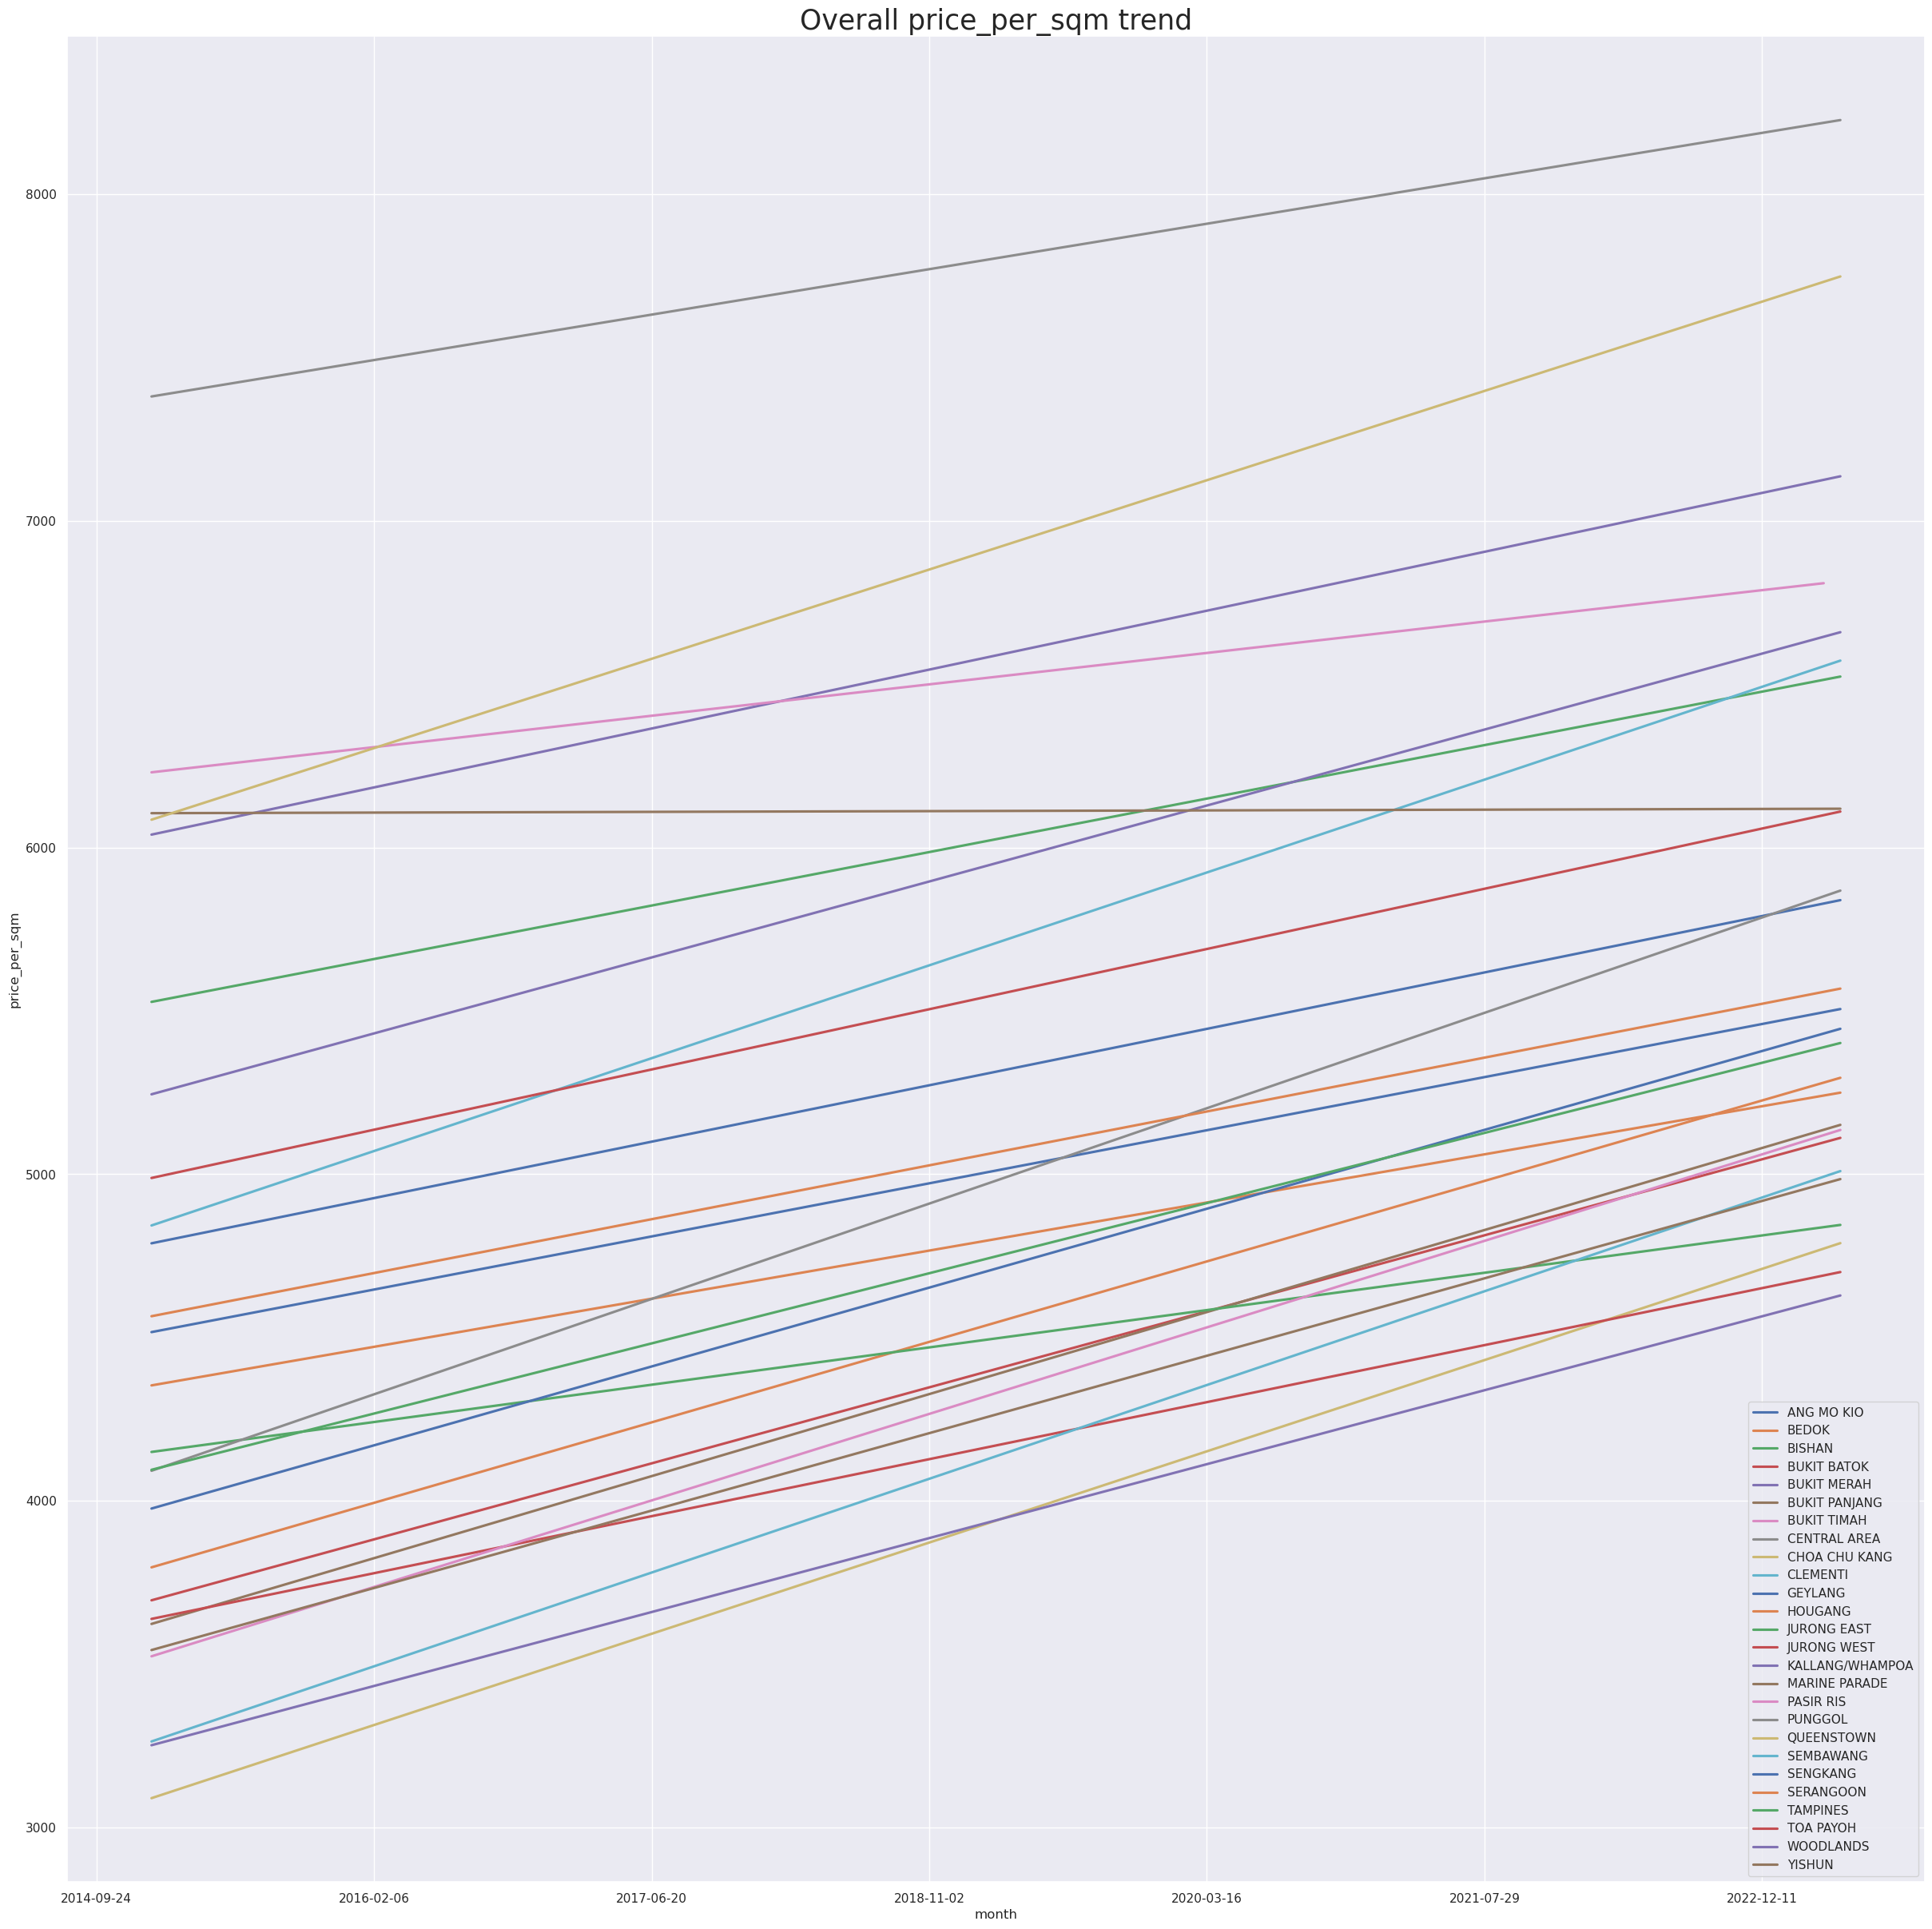

In [32]:
generate_time_series_linear_regression(CleanUpDataset, parameters['time_series_linear_regression_parameters'])

## 